## Project 1 - Simulated Data Set Analysis 

***

Author: Emma Dunleavy 

Student Number: g00425660

Module: Programming for Data Analysis Winter 2023/24  

Lecturer: Brian McGinley
***

### Required Libraries
***

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import f_oneway

<span style='color:orange'> Question Part 1 - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. </span>

Using the results derived from the Mashad stroke and heart atherosclerotic disorders (MASHAD) study (2010-2020) [1], I have selected variables as per tables 1 below for analysis, with a focus on systolic blood pressure, for people categorised as "Normal weight", "Underweight" and "Obese". For the discussion in this report the "Normal Weight" variable will be reported as "Healthy weight".  The other contributing measured variables are "Age", "Weight", "Height" and "Total energy expenditure". Table 1 provides a summary of the study's statistical findings, which is a sample of the complete results, follow the link below for a comprehensive listing of the study findings.

[Dietary Intake and Its Relationship to Different Body Mass Index Categories: A Population-Based Study ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6941633/)

|Variable| 	Healthy weight| 	Underweight |	 Obese|
|:-----|-----|:-----:|-----:|
||**Mean / 	SD**| **Mean 	/ SD** |**Mean	/  SD**|	
|<span style='color:green'>**Age (yr)**</span> |	47.9 / 8.5|	47.6	/ 8.1|		48.4	/ 7.9	|
|<span style='color:green'>**Weight(kg)**</span> |	47.9 /	6.5|	48.2 /	8.6|		81.6 /	14.8|
|<span style='color:green'>**Height (meter)**</span> |	1.6	/0.1	|1.6	/0.1		|1.5 /0.1	|
|<span style='color:green'>**Total energy expenditure**</span> |	2362.0	/ 341.2	|2380.6	 / 384.6	|  2344.0 /	269.9|
|<span style='color:green'>**Systolic blood pressure (mmHg)**</span> | 	116.3 /	19.1 |	111.3	/ 20.0	| 	122.6	/ 26.2 |

**<i>Table 1 - Statistical findings of continuous data<i>**

<span style='color:orange'>Part 2: Investigate the types of variables involved, their likely distributions, and their
relationships with each other.</span>

 |Variable|Age (yr) |Weight(kg) | Total energy expenditure   |Systolic blood pressure (mmHg) |Weight Category|
 |---|:---|---|---|---|---|
 |**variable type level 1**|numerical|numerical|numerical|numerical|categorical|
 |**variable type level 2**|continuous - ratio|continuous - ratio|continuous - ratio|continuous - ratio|nominal|

 **<i>Table 2 - Variable Types<i>**

The study stated *"Descriptive statistics including <kbd>mean ± standard deviation (SD)</kbd> &nbsp; were determined for variables with normal distribution"*, which is the case for the variables per table 1 so it can therefore be stated all variables for discussion in this report are normally distributed. 


<span style='color:orange'>Part 3: Synthesise/simulate a data set as closely matching their properties as possible.</span>

## Healthy Weight Data Generation
***

In [138]:
# Define the means and standard deviations for the "healthy weight" variables
hw_age_mean = 47.9
hw_age_sd = 8.5
  
hw_weight_mean = 47.9
hw_weight_sd = 6.5

hw_height_mean = 1.6
hw_height_sd = 0.1

hw_tee_mean = 2362.0
hw_tee_sd = 341.2

hw_bp_mean = 116.3
hw_bp_sd = 19.1

In [152]:
# Set the random seed for reproducibility. 
np.random.seed(0)

# Generate random data for each variable with the specified standard deviations
hw_age = np.random.normal(hw_age_mean, hw_age_sd, 100000)
hw_weight = np.random.normal(hw_weight_mean, hw_weight_sd, 100000)
hw_height = np.random.normal(hw_height_mean, hw_height_sd, 100000)
hw_tee = np.random.normal(hw_tee_mean, hw_tee_sd, 100000)
hw_bp = np.random.normal(hw_bp_mean, hw_bp_sd, 100000)

hw_age.mean()

47.913401954319056

In [153]:
hw_age.std()

8.477387346532744

In [142]:
# Create a dataset by combining the variables
hw_dataset = np.column_stack((hw_age, hw_height, hw_weight, hw_tee, hw_bp))

In [151]:
# Confirmatory calculation. Show the healthy weight age std dev.
hw_age.std()

8.477387346532744

The smaller the sample size the further the outputted mean and standard deviation, using the random generator, is from the originally provided values. 

For eaxmple for the age variable 
a sample size of 100 provided and mean of 48.408 (0.5 away) and a standard deviation of 8.566 
a sample size of 1000 provided and mean of 47.515 (0.4 away) and a standard deviation of 8.389
a sample size of 10000 provided and mean of 47.743 (0.2 away) and a standard deviation of 8.394
a sample size of 100000 provided and mean of 47.913 (on target) and a standard deviation of 8.477

hw_age_mean = 47.9
hw_age_sd = 8.5

Increasing the sample size to 100,000  result is not an exact match as the numbers are randomly generated using the provided mean and the standard deviation as parmeters to generate the dataset. By testing sample size numbers I found by increasing the sample I got closer to the true number. Increasing the sample size to 100,000 provided a result of closest to the provided number.

### Convert Healthy Weight data to a DataFrame

In [ ]:
hw_dataframe = pd.DataFrame(hw_dataset, columns = ['hw_age', 'hw_height', 'hw_weight', 'hw_tee', 'hw_bp'])
hw_dataframe

,hw_age,hw_height,hw_weight,hw_tee,hw_bp
0,62.894445,1.603951,44.755316,2909.877500,96.211808
1,51.301336,1.633838,56.272371,1988.485059,118.970366
2,56.219273,1.515782,47.055788,2791.356609,95.314403
3,66.947592,1.595037,46.612490,2859.500553,138.837750
4,63.774243,1.476975,45.725831,2262.300267,95.086212
...,...,...,...,...,...
99995,45.029425,1.629220,49.666878,2568.445659,143.481373
99996,30.657338,1.665847,48.228296,2228.657682,127.279359
99997,54.072547,1.629478,52.240796,2784.537277,107.118645
99998,37.973441,1.811863,41.262236,2319.245715,104.656270


In [ ]:
# Generate the Healthy Weight categorical DataFrame.
hw_cat_df = pd.DataFrame (['healty weight'] * 100000,  columns=['Weight Category'])
hw_dataframe1 = pd.concat([hw_dataframe, hw_cat_df], axis = 1)


In [ ]:
# Show the healthy weight dataframe with the categorical column added. 
hw_dataframe1

,hw_age,hw_height,hw_weight,hw_tee,hw_bp,Weight Category
0,62.894445,1.603951,44.755316,2909.877500,96.211808,healty weight
1,51.301336,1.633838,56.272371,1988.485059,118.970366,healty weight
2,56.219273,1.515782,47.055788,2791.356609,95.314403,healty weight
3,66.947592,1.595037,46.612490,2859.500553,138.837750,healty weight
4,63.774243,1.476975,45.725831,2262.300267,95.086212,healty weight
...,...,...,...,...,...,...
99995,45.029425,1.629220,49.666878,2568.445659,143.481373,healty weight
99996,30.657338,1.665847,48.228296,2228.657682,127.279359,healty weight
99997,54.072547,1.629478,52.240796,2784.537277,107.118645,healty weight
99998,37.973441,1.811863,41.262236,2319.245715,104.656270,healty weight


## Under Weight Data Generation
***

In [ ]:
# Define the means and standard deviations for the "healthy weight" variables
uw_age_mean = 47.6
uw_age_sd = 8.1
  
uw_weight_mean = 48.2
uw_weight_sd = 8.6

uw_height_mean = 1.6
uw_height_sd = 0.1

uw_tee_mean = 2380.6
uw_tee_sd = 384.6

uw_bp_mean = 111.3
uw_bp_sd = 20.0

In [ ]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate random data for each variable with the specified standard deviations
uw_age = np.random.normal(uw_age_mean, uw_age_sd, 1000)
uw_weight = np.random.normal(uw_weight_mean, uw_weight_sd, 1000)
uw_height = np.random.normal(uw_height_mean, uw_height_sd, 1000)
uw_tee = np.random.normal(uw_tee_mean, uw_tee_sd, 1000)
uw_bp = np.random.normal(uw_bp_mean, uw_bp_sd, 1000)

# Create a dataset by combining the variables
uw_dataset = np.column_stack((uw_age, uw_height, uw_weight, uw_tee, uw_bp))


In [ ]:
uw_dataframe = pd.DataFrame(uw_dataset, columns = ['uw_age', 'uw_height', 'uw_weight', 'uw_tee', 'uw_bp'])
uw_dataframe

,uw_age,uw_height,uw_weight,uw_tee,uw_bp
0,61.888824,1.446708,52.981279,2993.373033,123.566983
1,50.841273,1.428803,55.875275,2599.330635,148.174000
2,55.527778,1.604614,44.568093,2336.568282,116.721820
3,65.751235,1.504163,49.100541,2477.376994,134.028953
4,62.727220,1.591919,50.161259,1914.904922,76.533363
...,...,...,...,...,...
995,50.944254,1.807918,49.040657,2186.803949,109.272511
996,45.992969,1.509253,60.253101,3065.018424,126.233314
997,48.362958,1.580760,49.562531,2368.841838,129.883636
998,38.304351,1.478748,38.379648,2987.148127,115.888360


In [ ]:
uw_cat_df = pd.DataFrame (['underweight'] * 1000,  columns=['Weight Category'])
uw_dataframe1 = pd.concat([ uw_dataframe, uw_cat_df], axis = 1)
uw_dataframe1

,uw_age,uw_height,uw_weight,uw_tee,uw_bp,Weight Category
0,61.888824,1.446708,52.981279,2993.373033,123.566983,underweight
1,50.841273,1.428803,55.875275,2599.330635,148.174000,underweight
2,55.527778,1.604614,44.568093,2336.568282,116.721820,underweight
3,65.751235,1.504163,49.100541,2477.376994,134.028953,underweight
4,62.727220,1.591919,50.161259,1914.904922,76.533363,underweight
...,...,...,...,...,...,...
995,50.944254,1.807918,49.040657,2186.803949,109.272511,underweight
996,45.992969,1.509253,60.253101,3065.018424,126.233314,underweight
997,48.362958,1.580760,49.562531,2368.841838,129.883636,underweight
998,38.304351,1.478748,38.379648,2987.148127,115.888360,underweight


## Obese Weight Data Generation
***

In [ ]:
# Define the means and standard deviations for the "obese" variables
obese_age_mean = 48.4
obese_age_sd = 7.9

obese_weight_mean = 81.6
obese_weight_sd = 14.8

obese_height_mean = 1.5
obese_height_sd = 0.1

obese_tee_mean = 2344.0
obese_tee_sd = 269.9

obese_bp_mean = 122.6
obese_bp_sd = 26.2

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random data for each variable with the specified standard deviations
# Assumption data being reverse engineered is normally distributed
obese_age = np.random.normal(obese_age_mean, obese_age_sd, 1000)
obese_weight = np.random.normal(obese_weight_mean, obese_weight_sd, 1000)
obese_height = np.random.normal(obese_height_mean, obese_height_sd, 1000)
obese_tee = np.random.normal(obese_tee_mean, obese_tee_sd, 1000)
obese_bp = np.random.normal(obese_bp_mean, obese_bp_sd, 1000)

# Create a dataset by combining the variables
obese_dataset = np.column_stack((obese_age, obese_height, obese_weight, obese_tee, obese_bp))
#obese_dataset [:5]
obese_tee.mean()

2338.8873931784537

<function matplotlib.pyplot.show(close=None, block=None)>

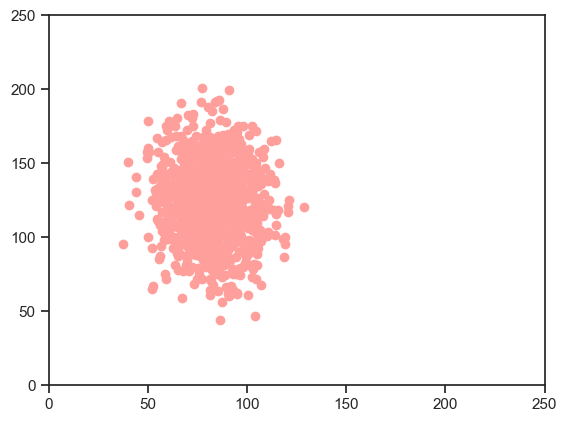

In [ ]:
plt.plot([obese_weight], [obese_bp], 'ro')
plt.axis((0,250,0,250))
plt.show

In [ ]:
ob_dataframe = pd.DataFrame(obese_dataset, columns = ['obese_age', 'obese_height', 'obese_weight', 'obese_tee', 'obese_bp'])
ob_dataframe

,obese_age,obese_height,obese_weight,obese_tee,obese_bp
0,62.336014,1.346708,89.828248,2774.024549,138.669748
1,51.561242,1.328803,94.808614,2497.498176,170.904939
2,56.132030,1.504614,75.349741,2313.099946,129.702584
3,66.103056,1.404163,83.149768,2411.915004,152.374928
4,63.153708,1.491919,84.975189,2017.190063,77.055705
...,...,...,...,...,...
995,51.661679,1.707918,83.046712,2208.000119,119.943990
996,46.832649,1.409253,102.342547,2824.302997,142.162642
997,49.144119,1.480760,83.944821,2335.748497,146.944563
998,39.333874,1.378748,64.699859,2769.656109,128.610752


In [ ]:
obese_cat_df = pd.DataFrame (['obese weight'] * 1000,  columns=['Weight Category'])
obese_dataframe1 = pd.concat([ob_dataframe, obese_cat_df], axis = 1)
obese_dataframe1

,obese_age,obese_height,obese_weight,obese_tee,obese_bp,Weight Category
0,62.336014,1.346708,89.828248,2774.024549,138.669748,obese weight
1,51.561242,1.328803,94.808614,2497.498176,170.904939,obese weight
2,56.132030,1.504614,75.349741,2313.099946,129.702584,obese weight
3,66.103056,1.404163,83.149768,2411.915004,152.374928,obese weight
4,63.153708,1.491919,84.975189,2017.190063,77.055705,obese weight
...,...,...,...,...,...,...
995,51.661679,1.707918,83.046712,2208.000119,119.943990,obese weight
996,46.832649,1.409253,102.342547,2824.302997,142.162642,obese weight
997,49.144119,1.480760,83.944821,2335.748497,146.944563,obese weight
998,39.333874,1.378748,64.699859,2769.656109,128.610752,obese weight


### Concatonating data 

In [ ]:
hw_age = hw_dataframe['hw_age']
uw_age = uw_dataframe['uw_age']
obese_age = ob_dataframe['obese_age']
age = pd.concat([hw_age, uw_age, obese_age])
age_df = pd.DataFrame(age)
type (age_df)

pandas.core.frame.DataFrame

In [ ]:
hw_weight = hw_dataframe['hw_weight']
uw_weight = uw_dataframe['uw_weight']
obese_weight = ob_dataframe['obese_weight']
weight = pd.concat([hw_weight, uw_weight, obese_weight])
weight_df = pd.DataFrame(weight)

In [ ]:
hw_height = hw_dataframe['hw_height']
uw_height = uw_dataframe['uw_height']
obese_height = ob_dataframe['obese_height']
height = pd.concat([hw_height, uw_height, obese_height])
height_df = pd.DataFrame(height)

In [ ]:
hw_tee = hw_dataframe['hw_tee']
uw_tee = uw_dataframe['uw_tee']
obese_tee = ob_dataframe['obese_tee']
tee = pd.concat([hw_tee, uw_tee, obese_tee])
tee_df = pd.DataFrame(tee)

In [ ]:
hw_bp = hw_dataframe['hw_bp']
uw_bp = uw_dataframe['uw_bp']
obese_bp = ob_dataframe['obese_bp']
bp = pd.concat([hw_bp, uw_bp, obese_bp])
bp_df = pd.DataFrame(bp)

In [ ]:
combined_continuous = pd.concat([age_df , weight_df,height_df, tee_df, bp_df], axis=1)
combined_continuous.columns = ['Age' , 'Weight', 'Height', 'Total Energy Ex', 'Blood Pressure' ]
combined_continuous

,Age,Weight,Height,Total Energy Ex,Blood Pressure
0,62.894445,44.755316,1.603951,2909.877500,96.211808
1,51.301336,56.272371,1.633838,1988.485059,118.970366
2,56.219273,47.055788,1.515782,2791.356609,95.314403
3,66.947592,46.612490,1.595037,2859.500553,138.837750
4,63.774243,45.725831,1.476975,2262.300267,95.086212
...,...,...,...,...,...
995,51.661679,83.046712,1.707918,2208.000119,119.943990
996,46.832649,102.342547,1.409253,2824.302997,142.162642
997,49.144119,83.944821,1.480760,2335.748497,146.944563
998,39.333874,64.699859,1.378748,2769.656109,128.610752


### Generating the Categorical Variable 'Weight Category'

In [ ]:
hw = hw_dataframe1['Weight Category']
uw = uw_dataframe1['Weight Category']
obese = obese_dataframe1['Weight Category']
weightcat = pd.concat([hw, uw, obese])
weightcat_df = pd.DataFrame(weightcat)
weightcat_df

,Weight Category
0,healty weight
1,healty weight
2,healty weight
3,healty weight
4,healty weight
...,...
995,obese weight
996,obese weight
997,obese weight
998,obese weight


In [ ]:
combined_all = pd.concat([combined_continuous, weightcat_df], axis=1)
combined_all

,Age,Weight,Height,Total Energy Ex,Blood Pressure,Weight Category
0,62.894445,44.755316,1.603951,2909.877500,96.211808,healty weight
1,51.301336,56.272371,1.633838,1988.485059,118.970366,healty weight
2,56.219273,47.055788,1.515782,2791.356609,95.314403,healty weight
3,66.947592,46.612490,1.595037,2859.500553,138.837750,healty weight
4,63.774243,45.725831,1.476975,2262.300267,95.086212,healty weight
...,...,...,...,...,...,...
995,51.661679,83.046712,1.707918,2208.000119,119.943990,obese weight
996,46.832649,102.342547,1.409253,2824.302997,142.162642,obese weight
997,49.144119,83.944821,1.480760,2335.748497,146.944563,obese weight
998,39.333874,64.699859,1.378748,2769.656109,128.610752,obese weight


## Histogram of continuous variables
***

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Total Energy Ex'}>],
       [<Axes: title={'center': 'Blood Pressure'}>, <Axes: >]],
      dtype=object)

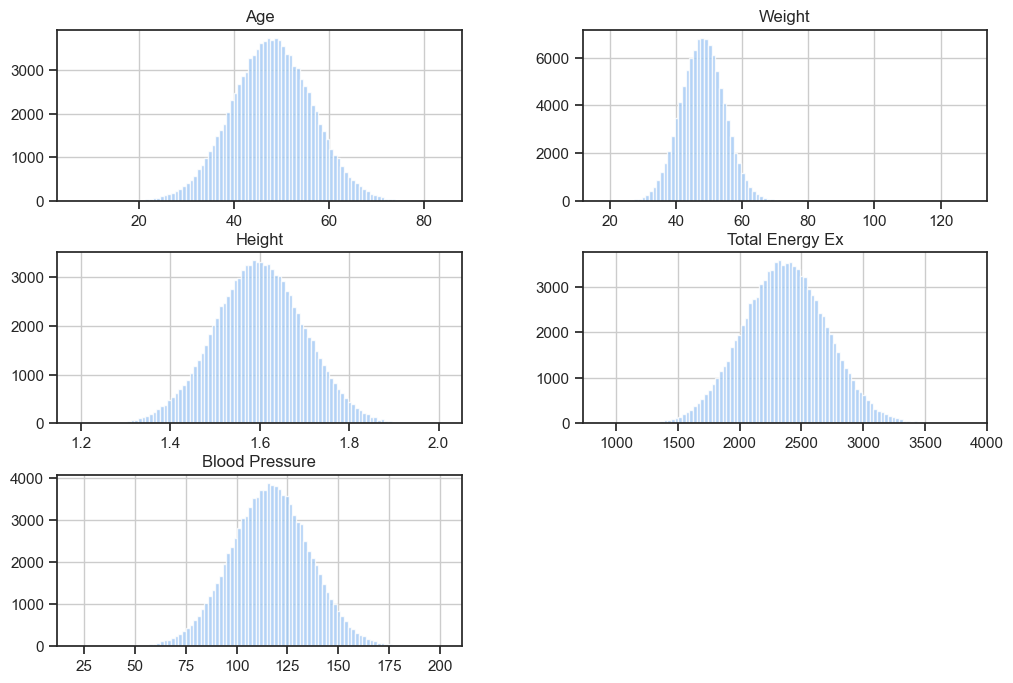

In [ ]:
combined_all.hist(alpha=0.8, bins=100, figsize=(12,8))

## Scatterplots
***

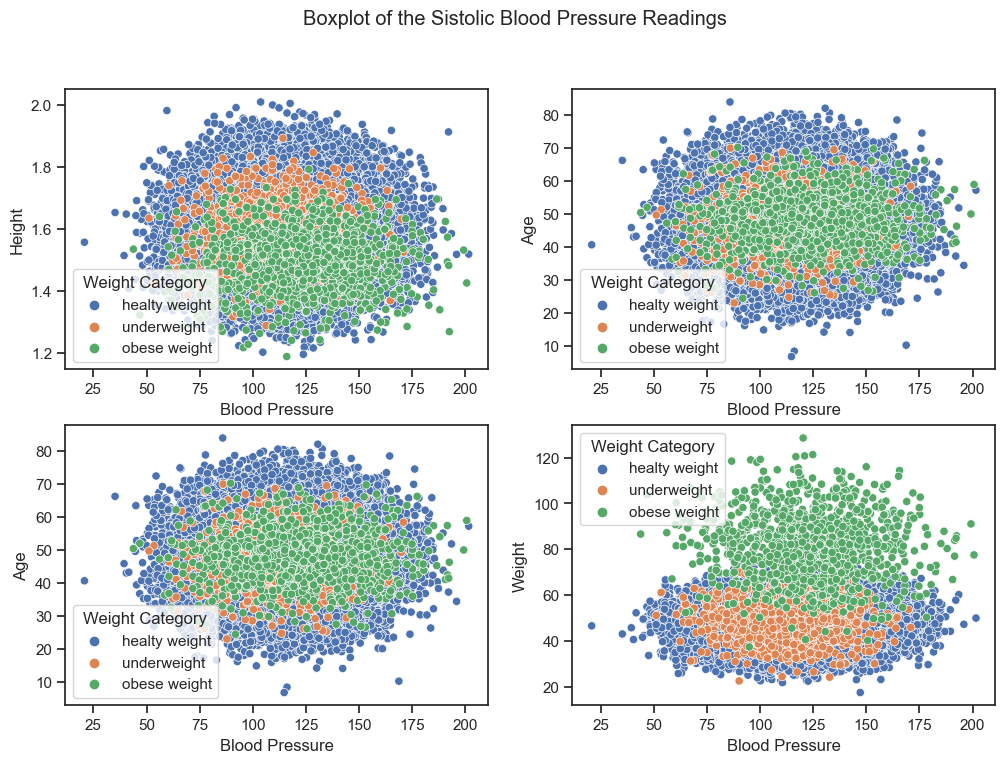

In [ ]:
sns.set(style="ticks", palette="deep")
f, axes = plt.subplots(2, 2, sharey=False, figsize=(12, 8))
sns.scatterplot(x = "Blood Pressure", y = "Age", hue = 'Weight Category', data = combined_all, ax=axes[0,1])
sns.scatterplot(x = "Blood Pressure" , y = "Weight"  , hue = 'Weight Category' , data = combined_all, ax=axes[1,1])
sns.scatterplot(x= "Blood Pressure"  , y= "Height", hue = 'Weight Category', data = combined_all, ax=axes[0,0])
sns.scatterplot(x= "Blood Pressure" , y= "Age", hue = 'Weight Category', data = combined_all, ax=axes[1,0])
f.suptitle("Boxplot of the Sistolic Blood Pressure Readings")
plt.show()

## Boxplots
***

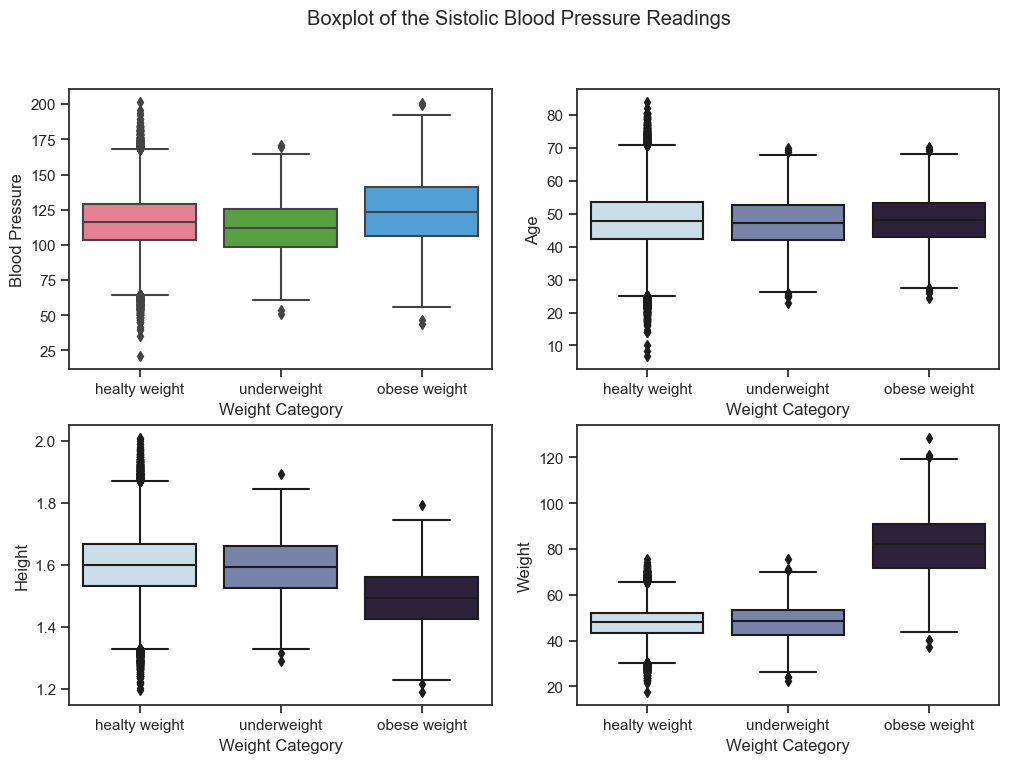

In [ ]:
sns.set(style="ticks", palette="pastel")
f, axes = plt.subplots(2, 2, sharey=False, figsize=(12, 8))

sns.boxplot(x= 'Weight Category', y= "Age", data = combined_all, palette = "ch:s=.25,rot=-.25",  ax=axes[0,1])
sns.boxplot(x= 'Weight Category', y= "Weight", data = combined_all,  palette = "ch:s=.25,rot=-.25",  ax=axes[1,1])
sns.boxplot(x= 'Weight Category', y= "Height", data = combined_all,  palette = "ch:s=.25,rot=-.25", ax=axes[1,0])
sns.boxplot(x= 'Weight Category', y= "Blood Pressure", data = combined_all, palette = "husl" ,ax=axes[0,0])
f.suptitle("Boxplot of the Sistolic Blood Pressure Readings")
plt.show()

## Alternative method for generating categorical data

|Variable| |	Healthy weight| 	Underweight |	 Obese| Ratio (for generation of data)|
|-----|-----|-----|-----|---|---|
|<span style='color:green'>**Employment Status**</span>| **Class**||||
||Student             |	2	    |1|	                4|0.002|
||Employed            |	1194    |70|              	721| 0.356|
||Unemployed          |	1064	|51 |                	1991|0.557|
||Retired             |	251	    |13  |            	212	| 0.085|

**<i>Table 2 - Counts of categorical data<i>**

In [ ]:
import random
categories = ['Student', 'Employed', 'Unemployeed','Retired']
weights = [0.002, 0.356, 0.557, 0.085]  # Adjust weights based on desired probabilities

# Generate a list of random categories with specified weights
num_samples = 3000
random_employment_list = random.choices(categories, weights=weights, k=num_samples)
employment_list = pd.Series(random_employment_list, dtype="category")
employment_list.cat.categories
employment_list

employment_df = pd.DataFrame(random_employment_list)
employment_df.index.is_unique
employment_df.columns = ['Employment Status']

employment_df

,Employment Status
0,Unemployeed
1,Unemployeed
2,Unemployeed
3,Employed
4,Unemployeed
...,...
2995,Unemployeed
2996,Unemployeed
2997,Unemployeed
2998,Employed


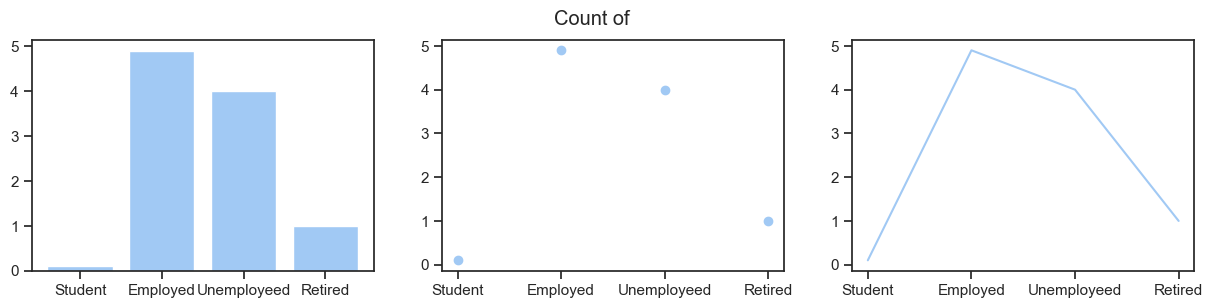

In [ ]:
names = ['Student', 'Employed', 'Unemployeed','Retired']
values = [0.1, 4.9, 4.0, 1.0]

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Count of ')
plt.show()

In [ ]:
print(combined_continuous.index.duplicated().any())
print(employment_df.index.duplicated().any())

True
False


In [ ]:
combined_continuous.reset_index(drop=True, inplace=True)
employment_df.reset_index(drop=True, inplace=True)


In [ ]:
combined_all1 = pd.concat([combined_continuous, employment_df], axis=1)
combined_all1


,Age,Weight,Height,Total Energy Ex,Blood Pressure,Employment Status
0,62.894445,44.755316,1.603951,2909.877500,96.211808,Unemployeed
1,51.301336,56.272371,1.633838,1988.485059,118.970366,Unemployeed
2,56.219273,47.055788,1.515782,2791.356609,95.314403,Unemployeed
3,66.947592,46.612490,1.595037,2859.500553,138.837750,Employed
4,63.774243,45.725831,1.476975,2262.300267,95.086212,Unemployeed
...,...,...,...,...,...,...
101995,51.661679,83.046712,1.707918,2208.000119,119.943990,NaN
101996,46.832649,102.342547,1.409253,2824.302997,142.162642,NaN
101997,49.144119,83.944821,1.480760,2335.748497,146.944563,NaN
101998,39.333874,64.699859,1.378748,2769.656109,128.610752,NaN


Using ```obese_tee.mean()``` to test the output v's the inputted <kbd>mean</kbd> shows there is a difference between these two values. The main factors contributing to the discrepancy could include:

1. Sample Size: The mean calculated from a sample of 1000 data points may not exactly match the population mean you specified (i.e., obese_tee_mean). The larger the sample size, the closer the sample mean is expected to be to the population mean, but it may still exhibit some variation.

2. Randomness: Even when generating data from a normal distribution with a specified mean and standard deviation, there is inherent randomness in the process. Each time you run the code, you may get a slightly different mean due to the randomness of the data points generated.

3. Parameter Accuracy: Ensure that the values of obese_tee_mean and obese_tee_sd are set correctly. Any deviation in these parameters will result in a discrepancy between the calculated mean and the specified mean.

4. Calculation Error: The calculation of the mean using obese_tee.mean() is generally accurate, but if there is a coding error or if the data in obese_tee is not as expected, it can lead to a different result.

## REFERENCES NEEDED!!!!

In [ ]:
obese_tee.std()

274.3051416300157

### t-Test comparing Weight and Sistolic Blood Proessure
***

In [ ]:
ss.ttest_ind(hw_bp, obese_bp)

Ttest_indResult(statistic=-11.418417871622141, pvalue=3.530913033141673e-30)

## One-way ANOVA comparing Blood Pressure Variables 

In [ ]:
f_oneway(uw_bp, hw_bp, obese_bp)

F_onewayResult(statistic=93.12903667271662, pvalue=3.9035283404165814e-41)

The null  hypothesis is there is no relastionship between weight and blood pressure

Synthesise/simulate a data set as closely matching their properties as possible.

Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### References

[1] Rashidi AA, Heidari Bakavoli AR, Avan A, Aghasizade M, Ghazizadeh H, Tayefi M, Khayyatzadeh SS, Ebrahimi M, Moohebati M, Safarian M, Nematy M, Sadr-Bazzaz M, Ferns GA, Ghayour Mobarhan M. Dietary Intake and Its Relationship to Different Body Mass Index Categories: A Population-Based Study. J Res Health Sci. 2018 Sep 8;18(4):e00426. PMID: 30728312; PMCID: PMC6941633, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6941633/ accessed on 06 NOV 2023

https://datatofish.com/numpy-array-to-pandas-dataframe/ (visited 08 Nov 2023)

https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/ (visited 08 Nov 2023)

Pandas Website url: https://pandas.pydata.org/docs/user_guide/merging.html (visited 08 Nov 2023)

https://www.sciencedirect.com/science/article/pii/S1047279796001275 (visited 08 Nov 2023)

https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/ (visited 12 Nov 2023)

https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/ (visited 12 Nov 2023)

https://matplotlib.org/stable/tutorials/pyplot.html (visited 12 Nov 2023)

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette (visited 13 Nov 2023)